# Autoencoder of MNIST by Conv&FCN 20171001

## 1. Import library

In [1]:
import os
import h5py
import numpy as np
import tensorflow as tf
import time
import glob
import json
import csv
from PIL import Image
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

import keras
from keras import applications
from keras.preprocessing import image

from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.models import Sequential
from keras.layers import Input, UpSampling2D
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D,Cropping2D,BatchNormalization
from keras.layers import Activation, Dropout, Flatten, Dense, Lambda, GlobalAveragePooling2D
from keras.utils.np_utils import to_categorical
from keras.models import Model

from keras import backend as K

Using TensorFlow backend.


## 2. Create autoencoder of MNIST

In [2]:
input_img = Input(shape=(28, 28, 1))  # adapt this if using `channels_first` image data format

x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded= GlobalAveragePooling2D()(x) # This can be used as features in 2nd step

x = Dense(128)(encoded)
x = Lambda(K.reshape, arguments={'shape': (-1,4,4,8)})(x)

x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

## 3. Confirm the strucutre of the autoencoder

In [3]:
autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 8)           584       
_________________________________________________________________
global_average_pooling2d_1 ( (None, 8)                 0         
__________

## 4. Import MNIST data

In [4]:
from keras.datasets import mnist

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))  # adapt this if using `channels_first` image data format
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))  # adapt this if using `channels_first` image data format

## 5. Train the autoencoder

Train on 60000 samples, validate on 10000 samples
Epoch 1/25
60000/60000 [==============================] - 145s - loss: 0.2377 - val_loss: 0.2359
Epoch 2/25
60000/60000 [==============================] - 148s - loss: 0.2177 - val_loss: 0.2186
Epoch 3/25
60000/60000 [==============================] - 147s - loss: 0.2043 - val_loss: 0.1987
Epoch 4/25
60000/60000 [==============================] - 148s - loss: 0.1961 - val_loss: 0.1911
Epoch 5/25
60000/60000 [==============================] - 146s - loss: 0.1917 - val_loss: 0.1893
Epoch 6/25
60000/60000 [==============================] - 141s - loss: 0.1888 - val_loss: 0.1868
Epoch 7/25
60000/60000 [==============================] - 147s - loss: 0.1864 - val_loss: 0.1854
Epoch 8/25
60000/60000 [==============================] - 147s - loss: 0.1848 - val_loss: 0.1825
Epoch 9/25
60000/60000 [==============================] - 147s - loss: 0.1833 - val_loss: 0.1833
Epoch 10/25
60000/60000 [==============================] - 150s - loss: 0.182

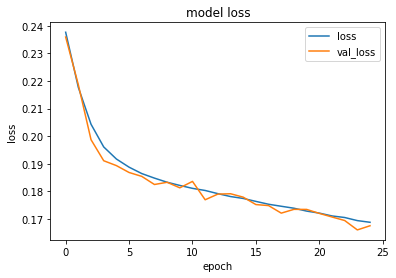

In [6]:
t=time.time() 

history=autoencoder.fit(x_train, x_train,
                epochs=25,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test),
               )


t2 = time.time()
print(round(t2-t, 5), 'Seconds to predict')

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['loss', 'val_loss'], loc='upper right')
plt.show()


## 6. Look at how the autoencoder can recover images

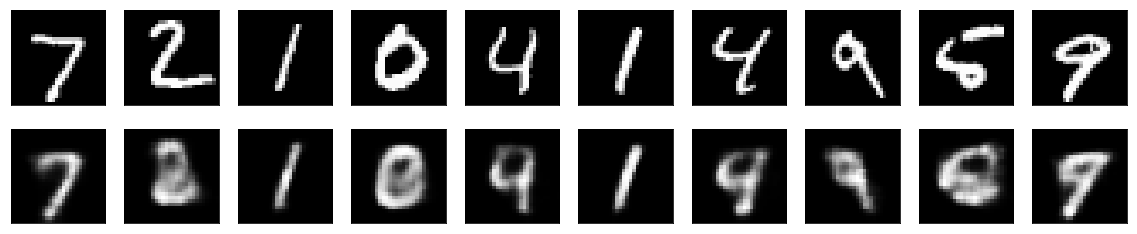

In [7]:
decoded_imgs = autoencoder.predict(x_test)

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

The idea of these code is inspired by this awesome work
      # "Building autoencoders in Keras" (by Mr.François Chollet)            
          # https://blog.keras.io/building-autoencoders-in-keras.html
                   

TOSHI STATS SDN. BHD. and I do not accept any responsibility or liability for loss or damage occasioned to any person or property through using materials, instructions, methods, algorithm or ideas contained herein, or acting or refraining from acting as a result of such use. TOSHI STATS SDN. BHD. and I expressly disclaim all implied warranties, including merchantability or fitness for any particular purpose. There will be no duty on TOSHI STATS SDN. BHD. and me to correct any errors or defects in the codes and the software.                    